## Scraping characters from wiki


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [8]:
# Name of the books in order
books_name = [
    "New Spring",
    "The Eye of the World",
    "The Great Hunt",
    "The Dragon Reborn",
    "The Shadow Rising",
    "The Fires of Heaven",
    "Lord of Chaos",
    "A Crown of Swords",
    "The Path of Daggers",
    "Winter's Heart",
    "Crossroads of Twilight",
    "Knife of Dreams",
    "The Gathering Storm",
    "Towers of Midnight",
    "A Memory of Light"
]


In [9]:
# Get all the links
base_url = "https://library.tarvalon.net"

page = requests.get("https://library.tarvalon.net/index.php?title=Character_Lists")
soup = BeautifulSoup(page.content, 'html.parser')

book_links = soup.find_all('a', title=lambda title: title and 'Character List' in title)


book_character_lists = []
for link in book_links:
    book_name = link.get_text(strip=True).replace(" Character List", "")
    book_url = base_url + link['href']
    book_character_lists.append({"book_name": book_name, "book_url": book_url})

In [10]:
print(book_character_lists)

[{'book_name': 'Aiel', 'book_url': 'https://library.tarvalon.net/index.php?title=Aiel_Character_List'}, {'book_name': 'Future Aiel', 'book_url': 'https://library.tarvalon.net/index.php?title=Future_Aiel_Character_List'}, {'book_name': 'Historical Aiel', 'book_url': 'https://library.tarvalon.net/index.php?title=Historical_Aiel_Character_List'}, {'book_name': 'Shaido', 'book_url': 'https://library.tarvalon.net/index.php?title=Shaido_Character_List'}, {'book_name': 'List of Wise Ones', 'book_url': 'https://library.tarvalon.net/index.php?title=Wise_One_Character_List'}, {'book_name': 'Maidens of the Spear', 'book_url': 'https://library.tarvalon.net/index.php?title=Maidens_of_the_Spear_Character_List'}, {'book_name': 'Altaran', 'book_url': 'https://library.tarvalon.net/index.php?title=Altaran_Character_List'}, {'book_name': 'Amadician', 'book_url': 'https://library.tarvalon.net/index.php?title=Amadician_Character_List'}, {'book_name': 'Andoran', 'book_url': 'https://library.tarvalon.net/ind

In [11]:
books_list = []

for book in book_character_lists:
    for book_name in books_name:
        if book_name == book["book_name"]:
            books_list.append({"book_name": book_name, "book_url": book["book_url"]})


In [12]:
print(books_list)

[{'book_name': 'New Spring', 'book_url': 'https://library.tarvalon.net/index.php?title=New_Spring_Character_List'}, {'book_name': 'The Eye of the World', 'book_url': 'https://library.tarvalon.net/index.php?title=The_Eye_of_the_World_Character_List'}, {'book_name': 'The Great Hunt', 'book_url': 'https://library.tarvalon.net/index.php?title=The_Great_Hunt_Character_List'}, {'book_name': 'The Dragon Reborn', 'book_url': 'https://library.tarvalon.net/index.php?title=The_Dragon_Reborn_Character_List'}, {'book_name': 'The Shadow Rising', 'book_url': 'https://library.tarvalon.net/index.php?title=The_Shadow_Rising_Character_List'}, {'book_name': 'The Fires of Heaven', 'book_url': 'https://library.tarvalon.net/index.php?title=The_Fires_of_Heaven_Character_List'}, {'book_name': 'Lord of Chaos', 'book_url': 'https://library.tarvalon.net/index.php?title=Lord_of_Chaos_Character_List'}, {'book_name': 'A Crown of Swords', 'book_url': 'https://library.tarvalon.net/index.php?title=A_Crown_of_Swords_Cha

In [13]:
characters_df = pd.DataFrame(columns = ["book", "character"])

for book in books_list:
    book_response = requests.get(book['book_url'])
    book_soup = BeautifulSoup(book_response.content, 'html.parser')
    character_pack = book_soup.find("div", class_="mw-content-ltr")
    for par in character_pack.find_all('p'):
      if par.find("a") != None:
        characters_df.loc[len(characters_df), ] = {"book" : book["book_name"], "character": par.find("a").text}



In [14]:
# Delete the names of the books from the dataframe
characters_df = characters_df[~characters_df["character"].isin(books_name)]

<Axes: ylabel='count'>

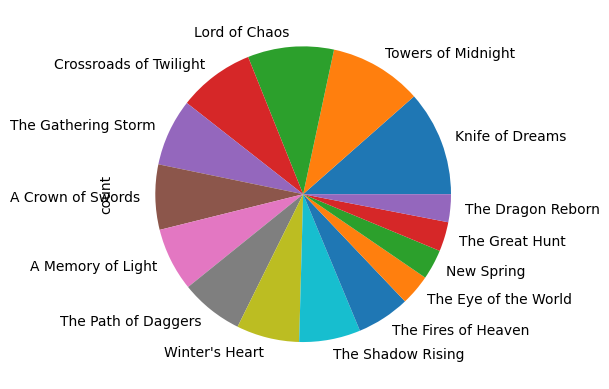

In [15]:
characters_df["book"].value_counts().plot.pie()

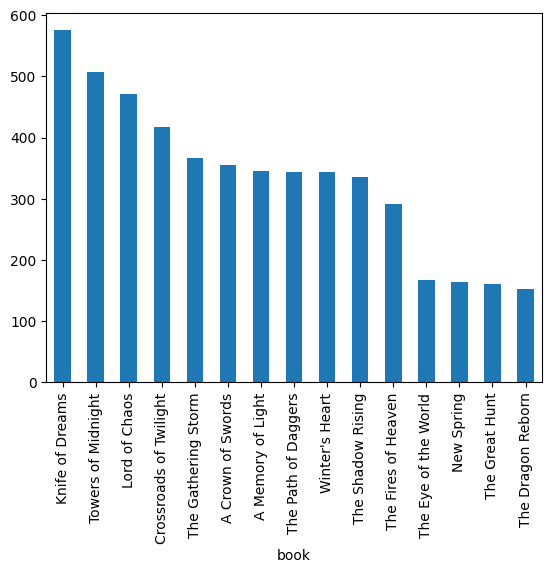

In [16]:
characters_df['book'].value_counts().plot(kind="bar")
plt.show()

In [18]:
# Count the number of occurrences of each character
character_counts = characters_df["character"].value_counts()

# Order the characters by frequency
character_counts = character_counts.sort_values(ascending=False)

# Print the top 10 characters
print(character_counts.head(10))

character
Morgase Trakand              15
Elayne Trakand               14
Elaida do Avriny a'Roihan    14
Gawyn Trakand                14
Elmindreda Farshaw           13
Logain Ablar                 13
Rand al'Thor                 12
Verin Mathwin                12
Moiraine Damodred            12
Siuan Sanche                 12
Name: count, dtype: int64


In [19]:
# Save the dataframe to a CSV file
characters_df.to_csv("characters_wot.csv")

## Scraping locations and nations


In [ ]:
page2 = requests.get("https://wot.fandom.com/wiki/Category:Geographical_regions")
page3 = requests.get("https://wot.fandom.com/wiki/Category:Nations")

soup2 = BeautifulSoup(page2.content, 'html.parser')
soup3 = BeautifulSoup(page3.content, 'html.parser')

In [ ]:
locations_urls = soup2.find_all("a", class_="category-page__member-link")
nations_urls = soup3.find_all("a", class_="category-page__member-link")

In [ ]:
locations = []
nations = []

for loc in locations_urls:
  locations.append(loc.text)
  
for nation in nations_urls:
  if nation.text != "Category:":
    nations.append(nation.text)

del nations[:6]

In [ ]:
locations = locations + nations